In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/ML/Mall_CustomersHi.csv") #path
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.shape #num of rows & column return

(200, 5)

In [ ]:
dataset.info() #data type + non null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dataset.describe() #NaN values chara shape/distribution describe

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
X = dataset.iloc[:,[3,4]].values # specific 3 & 4th column select & create new variable X
print(X.shape) #x dimension print with rows & column

(200, 2)


Text(0, 0.5, 'Euclidian Distance')

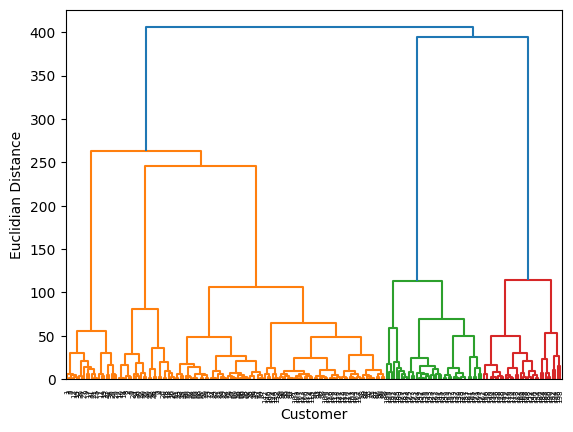

In [ ]:
import scipy.cluster.hierarchy as sch
#Dendogram --> data points relations with their distances.
#ward method --> Ward method is a technique used to calculate the distance between clusters during the clustering process
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward')) #to compute linkage --> dandogram create with ward method
#xlebel & ylebel
plt.xlabel("Customer")
plt.ylabel("Euclidian Distance")

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#Creates an instance of the AgglomerativeClustering class with specified parameters (5 clusters, Euclidean distance metric, and Ward linkage method).
hc = AgglomerativeClustering (n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
#Fits the hierarchical clustering model to the data X, performing clustering based on the specified parameters.
hc = hc.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
print(hc.labels_)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [ ]:
y_hc = hc.fit_predict(X) #fits the model to the data x & cluster predict
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(hc.labels_ ,y_hc)*100)

100.0


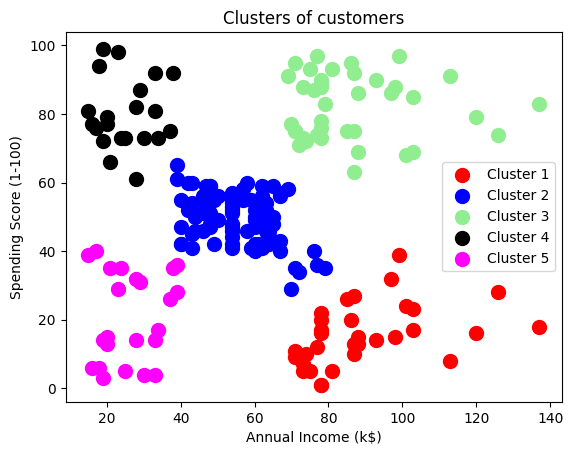

In [ ]:
#X[y_hc==0, 0] selects the x-coordinate values of data points belonging to Cluster 1 & similarly selects the y-coordinate values of data points belonging to Cluster 1
#Plots the data points belonging to Cluster 1. s=100 sets the size of the plotted points.
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='lightgreen', label='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='black', label='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label='Cluster 5')

plt.title('Clusters of customers')

#in x axis
plt.xlabel('Annual Income (k$)')
#in y axis

plt.ylabel('Spending Score (1-100)')

#lebel wise color plot
plt.legend()
plt.show()